In [14]:
from gp import GPTreebank
import operators as ops
from figtree import showtree
import pandas as pd
import numpy as np
from random import uniform
from math import pi, sin
from matplotlib import pyplot as plt 

In [2]:
gp = GPTreebank(mutation_rate=0, mutation_sd=0, crossover_rate=0.2, operators=[ops.EQ])

In [3]:
t5 = gp.tree("([bool]<EQ>([float]5.0)([int]5))")
t9 = gp.tree("([bool]<EQ>([float]9.0)([int]9))")
t3 = gp.tree("([bool]<EQ>([float]3.0)([int]3))")

In [4]:
n=10000
L_mut_9 = 0
R_mut_9 = 0 # Tribute to Rrose Sélavy
L_mut_3 = 0
R_mut_3 = 0 # Tribute to Rrose Sélavy
for i in range(n):
    cp = t5.copy(gp_copy=True)
    L_mut_9 += cp[0]()[0] == 9
    R_mut_9 += cp[1]()[0] == 9
    L_mut_3 += cp[0]()[0] == 3
    R_mut_3 += cp[1]()[0] == 3
    cp.delete()
    
print(L_mut_9/n, R_mut_9/n, L_mut_3/n, R_mut_3/n)

0.0944 0.0995 0.106 0.1004


In [9]:
iv_min=-5*pi
iv_max=5*pi
iv_dict = {'x': [uniform(iv_min, iv_max) for j in range(n)]}
iv_data = pd.DataFrame(iv_dict)

In [11]:
target = np.sin(iv_data['x'])

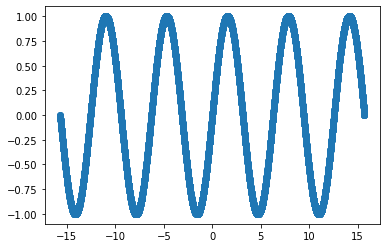

In [16]:
iv_data['x'].name

'x'

In [32]:
t = GPTreebank(operators=[ops.SUM, ops.PROD, ops.SQ, ops.POW, ops.CUBE]).tree("([float]<SUM>([float]0.009639889151812575)([float]<PROD>([float]<SUM>([float]<SUM>([float]<PROD>([float]-1.285429980496091)([float]2.4920440633677794))([float]<SUM>([float]x)([float]<POW>([float]<SQ>([float]-0.034412242329498424))([int]0))))([float]0.25969171209316233))([float]<PROD>([float]<SUM>([float]0.009912767110902507)([float]<PROD>([float]0.0238275413253935)([float]0.6697294474677175)))([float]<SUM>([float]<SUM>([float]<SUM>([float]<SUM>([float]0.012393089165790728)([float]<SQ>([float]<PROD>([float]0.11235966546549335)([float]x))))([float]-0.5543561169801772))([float]-0.4730826037642899))([float]<PROD>([float]-3.3050455491778727)([float]0.021275670795627012))))))", x=iv_data['x'])

In [33]:
t()

0      -0.536605
1       0.318772
2       0.001218
3       0.622550
4       0.026017
          ...   
9995    0.016407
9996   -0.031857
9997   -0.055422
9998   -0.015760
9999    0.035938
Length: 10000, dtype: float64

In [34]:
estimate = t()

In [27]:
estimate = pd.Series([0]*len(target))

In [28]:
estimate

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int64

In [30]:
results = {}
results["mse"] = (np.square(estimate - target)).mean()
results["imse"] = 1/results["mse"]
results

{'mse': 0.5062329157971686, 'imse': 1.9753753041231878}

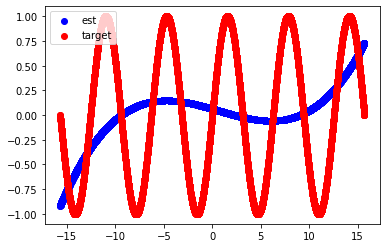

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(iv_data['x'], estimate, c='b', label='est')
ax1.scatter(iv_data['x'], target, c='r', label = 'target')
plt.legend(loc='upper left');
plt.show()

In [38]:
ax1.scatter(iv_data['x'], estimate)

AttributeError: 'PathCollection' object has no attribute 'scatter'